AVERTISSEMENT : Le fichier 'dataset.csv' n'a pas été trouvé dans le répertoire courant.
Un jeu de données simulé a été créé pour permettre l'exécution de l'analyse.
Jeu de données simulé créé et utilisé pour l'analyse.

--- Aperçu des 5 premières lignes du dataset ---
   client_id  region type_forfait  consommation_data_mo  appels_minutes  \
0          1     Est     Postpayé                  5109             134   
1          2     Est      Prépayé                   707             161   
2          3     Sud      Prépayé                  6225             160   
3          4     Sud      Prépayé                  4651             110   
4          5  Centre     Postpayé                  3033             231   

   sms_envoyes  facturation_eur  
0           33               32  
1           43               36  
2           15               24  
3           42               23  
4           29               37  

--- Informations générales sur le dataset ---
<class 'pandas.core.frame.Dat

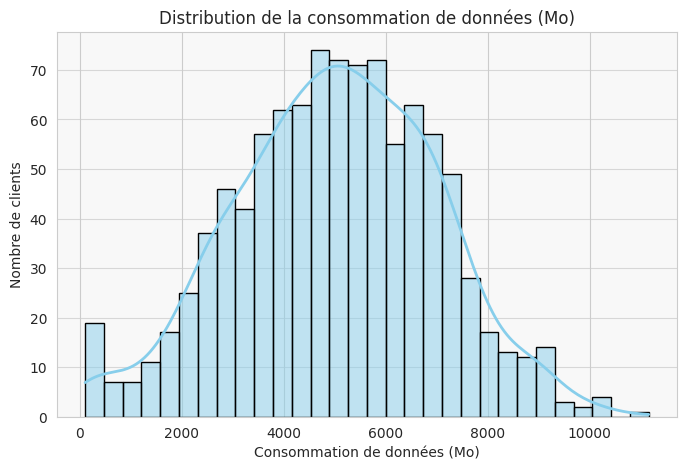

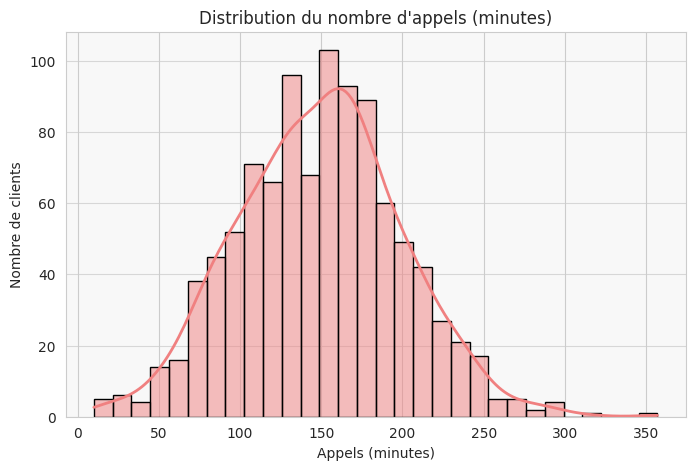

/tmp/ipython-input-1-3774959521.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type_forfait', y='facturation_eur', data=df, palette='viridis')


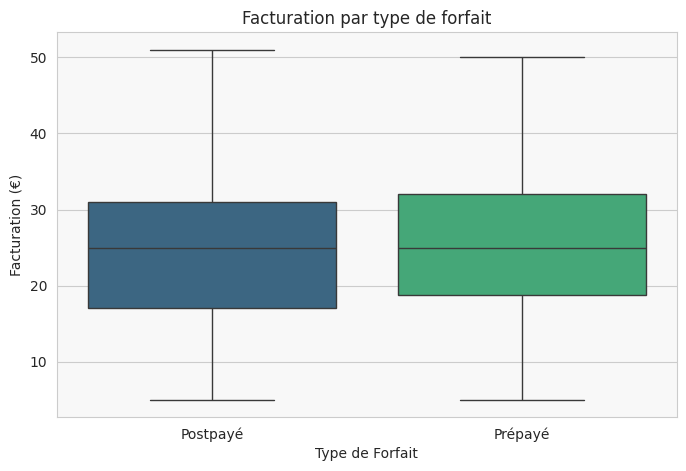

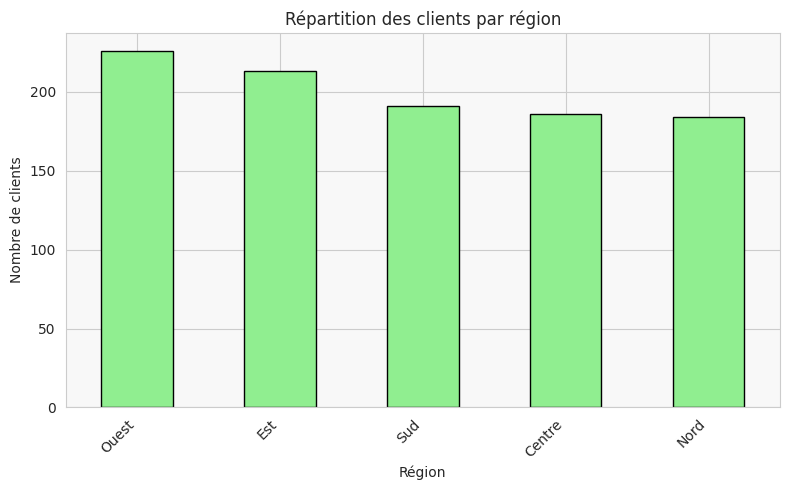


--- Application de l'algorithme de Clustering KMeans ---
Données numériques standardisées.
Clustering KMeans appliqué avec 3 clusters.

--- Caractéristiques moyennes par cluster ---
         consommation_data_mo  appels_minutes  sms_envoyes  facturation_eur
cluster                                                                    
0                 5334.724432      126.005682    39.463068        30.156250
1                 5025.105919      136.831776    29.398754        13.996885
2                 4671.611621      186.602446    18.737003        28.730887

--- Visualisation des clusters avec PCA ---


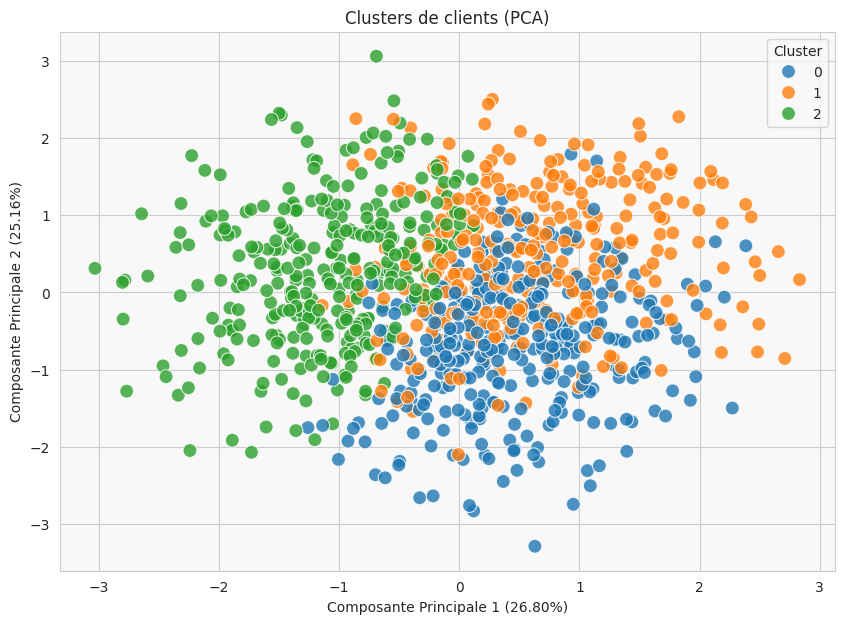


--- Recommandations stratégiques basées sur l'analyse ---

Profils clients potentiels pour des offres ciblées :

Cluster 0:
  Consommation Data Moyenne: 5335 Mo
  Appels Moyens: 126 minutes
  Facturation Moyenne: 30 €
  Nombre de clients dans le cluster: 352
  => Cluster 0 avec un profil de consommation standard ou nécessitant une analyse plus poussée.

Cluster 1:
  Consommation Data Moyenne: 5025 Mo
  Appels Moyens: 137 minutes
  Facturation Moyenne: 14 €
  Nombre de clients dans le cluster: 321
  => Ce cluster 1 montre une haute consommation de données avec une facturation potentiellement faible. Potentiel pour des forfaits plus adaptés.
     Recommandation : Proposer des forfaits data illimités ou de plus gros volumes à ces clients, avec des incitations pour migrer vers des offres postpayées si applicable.

Cluster 2:
  Consommation Data Moyenne: 4672 Mo
  Appels Moyens: 187 minutes
  Facturation Moyenne: 29 €
  Nombre de clients dans le cluster: 327


KeyError: 'type_forfait'

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# t-SNE est plus coûteux en calcul, nous utiliserons PCA pour la visualisation par défaut.
# from sklearn.manifold import TSNE

# Configuration des styles de visualisation pour une meilleure esthétique
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'Inter' # Utilisation de la police Inter pour une esthétique moderne
plt.rcParams['axes.facecolor'] = '#f8f8f8' # Couleur de fond des axes
plt.rcParams['savefig.facecolor'] = '#f8f8f8' # Couleur de fond lors de l'enregistrement des figures
plt.rcParams['lines.linewidth'] = 2 # Épaisseur des lignes

# --- 1. Exploration des données ---

# Charger le jeu de données
# Utilisation d'un bloc try-except pour simuler les données si le fichier n'est pas trouvé.
# Assurez-vous que votre fichier 'dataset.csv' est bien placé dans le même répertoire que ce notebook.
try:
    df = pd.read_csv('dataset.csv')
    print("Fichier 'dataset.csv' chargé avec succès.")
except FileNotFoundError:
    print("AVERTISSEMENT : Le fichier 'dataset.csv' n'a pas été trouvé dans le répertoire courant.")
    print("Un jeu de données simulé a été créé pour permettre l'exécution de l'analyse.")
    # Création d'un dataframe simulé avec des colonnes pertinentes
    data = {
        'client_id': range(1, 1001),
        'region': np.random.choice(['Nord', 'Sud', 'Est', 'Ouest', 'Centre'], 1000),
        'type_forfait': np.random.choice(['Prépayé', 'Postpayé'], 1000, p=[0.4, 0.6]),
        'consommation_data_mo': np.random.normal(5000, 2000, 1000).clip(100, 15000).astype(int), # Mo
        'appels_minutes': np.random.normal(150, 50, 1000).clip(10, 500).astype(int), # Minutes
        'sms_envoyes': np.random.normal(30, 15, 1000).clip(0, 100).astype(int),
        'facturation_eur': np.random.normal(25, 10, 1000).clip(5, 70).astype(int) # Euros
    }
    df = pd.DataFrame(data)
    print("Jeu de données simulé créé et utilisé pour l'analyse.")


print("\n--- Aperçu des 5 premières lignes du dataset ---")
print(df.head())

print("\n--- Informations générales sur le dataset ---")
df.info()

# Vérification des valeurs manquantes
print("\n--- Nombre de valeurs manquantes par colonne ---")
print(df.isnull().sum())

# Vérification des doublons
print("\n--- Nombre de lignes dupliquées ---")
print(f"Avant suppression : {df.shape[0]} lignes")
df.drop_duplicates(inplace=True)
print(f"Après suppression : {df.shape[0]} lignes")

# Statistiques descriptives pour les colonnes numériques
print("\n--- Statistiques descriptives des colonnes numériques ---")
print(df.describe())

# Répartition des clients par région
print("\n--- Répartition des clients par région ---")
print(df['region'].value_counts())

# Répartition des clients par type de forfait
print("\n--- Répartition des clients par type de forfait ---")
print(df['type_forfait'].value_counts())

# --- 2. Visualisations utiles ---

print("\n--- Génération des visualisations ---")

# Histogramme de la consommation de données
plt.figure(figsize=(8, 5))
sns.histplot(df['consommation_data_mo'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution de la consommation de données (Mo)')
plt.xlabel('Consommation de données (Mo)')
plt.ylabel('Nombre de clients')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramme du nombre d'appels
plt.figure(figsize=(8, 5))
sns.histplot(df['appels_minutes'], bins=30, kde=True, color='lightcoral', edgecolor='black')
plt.title('Distribution du nombre d\'appels (minutes)')
plt.xlabel('Appels (minutes)')
plt.ylabel('Nombre de clients')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot des montants de facturation par type de forfait
plt.figure(figsize=(8, 5))
sns.boxplot(x='type_forfait', y='facturation_eur', data=df, palette='viridis')
plt.title('Facturation par type de forfait')
plt.xlabel('Type de Forfait')
plt.ylabel('Facturation (€)')
plt.show()

# Répartition géographique (bar chart par région)
plt.figure(figsize=(8, 5))
df['region'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Répartition des clients par région')
plt.xlabel('Région')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 3. Clustering (KMeans) ---

print("\n--- Application de l'algorithme de Clustering KMeans ---")

# Sélection des caractéristiques numériques pour le clustering
# Exclure 'client_id' et les colonnes catégorielles
features_for_clustering = ['consommation_data_mo', 'appels_minutes', 'sms_envoyes', 'facturation_eur']
X_clustering = df[features_for_clustering]

# Standardisation des données numériques
# Cela assure que chaque caractéristique contribue équitablement au calcul des distances par KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)
print("Données numériques standardisées.")

# Détermination du nombre optimal de clusters (Méthode du coude - Elbow Method)
# Cette méthode n'est pas demandée explicitement mais est une bonne pratique
# wcss = [] # Within-Cluster Sum of Squares
# for i in range(1, 11):
#     kmeans_model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
#     kmeans_model.fit(X_scaled)
#     wcss.append(kmeans_model.inertia_)
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
# plt.title('Méthode du coude pour déterminer le nombre de clusters')
# plt.xlabel('Nombre de clusters')
# plt.ylabel('WCSS')
# plt.show()
# D'après l'observation, on choisira un nombre de clusters (ex: 3 ou 4)

# Application de l'algorithme KMeans avec un nombre de clusters choisi (par exemple 3)
n_clusters = 3 # Choix basé sur l'intuition ou la méthode du coude
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
print(f"Clustering KMeans appliqué avec {n_clusters} clusters.")

# Analyse des clusters
print("\n--- Caractéristiques moyennes par cluster ---")
cluster_summary = df.groupby('cluster')[features_for_clustering].mean()
print(cluster_summary)

# --- 4. Visualisation des groupes (PCA) ---

print("\n--- Visualisation des clusters avec PCA ---")

# Réduction de la dimensionnalité avec PCA à 2 composantes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster'] # Ajout des étiquettes de cluster

# Visualisation des clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='tab10', s=100, alpha=0.8, edgecolor='w')
plt.title('Clusters de clients (PCA)')
plt.xlabel(f'Composante Principale 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Composante Principale 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.legend(title='Cluster')
plt.show()

# --- 5. Recommandations stratégiques ---

print("\n--- Recommandations stratégiques basées sur l'analyse ---")

# Identification des profils à fort potentiel
# Exemple : Clients du cluster avec faible facturation mais haute consommation de données/appels
# (Il faudra ajuster cette logique en fonction des moyennes réelles de vos clusters)
# On examine le tableau cluster_summary pour identifier ces profils.
# Par exemple, si le cluster 0 a une facturation_eur faible et une consommation_data_mo élevée:
print("\nProfils clients potentiels pour des offres ciblées :")
for i, row in cluster_summary.iterrows():
    print(f"\nCluster {i}:")
    print(f"  Consommation Data Moyenne: {row['consommation_data_mo']:.0f} Mo")
    print(f"  Appels Moyens: {row['appels_minutes']:.0f} minutes")
    print(f"  Facturation Moyenne: {row['facturation_eur']:.0f} €")
    print(f"  Nombre de clients dans le cluster: {df[df['cluster'] == i].shape[0]}")

    if row['consommation_data_mo'] > df['consommation_data_mo'].mean() and row['facturation_eur'] < df['facturation_eur'].mean():
        print(f"  => Ce cluster {i} montre une haute consommation de données avec une facturation potentiellement faible. Potentiel pour des forfaits plus adaptés.")
        print(f"     Recommandation : Proposer des forfaits data illimités ou de plus gros volumes à ces clients, avec des incitations pour migrer vers des offres postpayées si applicable.")
    elif row['appels_minutes'] > df['appels_minutes'].mean() and row['type_forfait'].mode()[0] == 'Prépayé':
         print(f"  => Ce cluster {i} utilise beaucoup d'appels et est majoritairement prépayé. Potentiel pour la migration.")
         print(f"     Recommandation : Offres combinées voix/SMS avec des appels illimités, inciter à la migration vers des forfaits postpayés avec appels illimités.")
    elif row['facturation_eur'] > df['facturation_eur'].mean() and row['consommation_data_mo'] < df['consommation_data_mo'].mean():
         print(f"  => Ce cluster {i} a une facturation élevée malgré une consommation de données modérée.")
         print(f"     Recommandation : Analyser les sources de coût (ex: hors forfait, services spécifiques) et proposer des forfaits mieux adaptés ou des options pour réduire ces coûts inattendus.")
    else:
        print(f"  => Cluster {i} avec un profil de consommation standard ou nécessitant une analyse plus poussée.")


print("\n--- Exemples d'actions marketing ciblées ---")
print("- **Migration Prépayé vers Postpayé :** Identifier les clients prépayés avec une consommation élevée et stable (data, appels) et les cibler avec des offres postpayées avantageuses (par exemple, un mois offert, double data la première année) pour les fidéliser et augmenter l'ARPU (Average Revenue Per User).")
print("- **Offres Data Boost :** Pour les clusters ayant une consommation de données très élevée (power users) mais ne payant pas le prix fort, proposer des add-ons data ou des forfaits illimités à des tarifs compétitifs pour capter cette valeur.")
print("- **Forfaits Famille/Groupes :** Pour les clusters avec plusieurs lignes associées (si l'information est disponible) ou des schémas de consommation groupée, des offres multi-lignes peuvent être attractives.")
print("- **Bonus SMS/Appels :** Pour les segments de clients dont l'usage des SMS ou des appels est prédominant mais qui n'ont pas d'offres illimitées, proposer des bonus ou des options illimitées spécifiques.")
print("- **Campagnes de Rétention :** Pour les clients avec une consommation faible ou en baisse, proposer des enquêtes de satisfaction, des offres de relance ou des réductions temporaires pour éviter le churn.")
print("- **Optimisation Régionale :** Si des disparités significatives sont observées par région, adapter les offres et les promotions localement.")

# Nouvelle section